<a href="https://colab.research.google.com/github/bbalamdari/Sharing-codes/blob/master/Copy_of_blood_cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount into drive
from google.colab import drive
drive.mount("/content/grive")

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [ ]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#################skip this part below ###############################

In [ ]:
train_dir = '/content/grive/MyDrive/archive (1)/dataset2-master/dataset2-master/images/TRAIN'
test_dir = '/content/grive/MyDrive/archive (1)/dataset2-master/dataset2-master/images/TEST'

In [ ]:
# Create generators

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
# Flow image data

train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 9957 images belonging to 4 classes.


In [ ]:
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)


Found 9458 images belonging to 4 classes.


In [ ]:
test_images = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 2487 images belonging to 4 classes.


In [ ]:
############skip this part above##################################

# New Section

In [ ]:
folder_path = '/content/grive/MyDrive/archive (1)/dataset2-master/dataset2-master/images/TRAIN'
labels = ['Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']

In [ ]:
# give labels to images in each folder using folder name
import os
import cv2

images = []
image_labels = []

for folder in os.listdir(folder_path):
    print(folder)
    subfolder_path = os.path.join(folder_path, folder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.jpeg') or filename.endswith('.png'):
                image_path = os.path.join(subfolder_path, filename)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                label = folder.upper()
                images.append(image)
                image_labels.append(label)


EOSINOPHIL
LYMPHOCYTE
MONOCYTE
NEUTROPHIL


In [ ]:
len(images)

9957

In [ ]:
# takes too long even on colab. going to make a smaller trainig set for warm up

In [ ]:
# select indecs randomly for 5000 images to be trained on
import random

# Get the indices of all items in the list
all_indices = list(range(len(images)))

# Randomly select items along with their indices
random_indices = random.sample(all_indices, k=8000)
sampled_images = [images[i] for i in random_indices]
sampled_labels = [image_labels[i] for i in random_indices]



In [ ]:
# get the not selected indeces for test and validation later
not_selected_indices = [i for i in all_indices if i not in random_indices]
test_images = [images[i] for i in not_selected_indices]
test_labels = [image_labels[i] for i in not_selected_indices]


In [ ]:
# change the labels
map_label_to_type = {'EOSINOPHIL':1, 'LYMPHOCYTE':2, 'MONOCYTE':3, 'NEUTROPHIL':4}

updated_list = [map_label_to_type[value] for value in sampled_labels] # labels for training set

test_label_list = [map_label_to_type[value] for value in test_labels] # labels for test set

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to tensor for training set
images_tensor = torch.tensor(sampled_images).float().to(device)
labels_tensor = torch.tensor(np.array(updated_list)).int().to(device)

# Convert to tensor for test set
test_tensor_image = torch.tensor(test_images).float().to(device)
test_tensor_label = torch.tensor(np.array(test_label_list)).int().to(device)

<ipython-input-9-a58a4fcb0fcb>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  images_tensor = torch.tensor(sampled_images).float().to(device)


In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam

# convert to tensor for training set
images_tensor = torch.tensor(sampled_images).float()
labels_tensor = torch.tensor(np.array(updated_list)).int()

# convert to tensor for test set
test_tensor_image = torch.tensor(test_images).float()
test_tensor_label = torch.tensor(np.array(test_label_list)).int()

In [ ]:
# save trainig and test sets to save time
import h5py

# Save image tensor to HDF5 file for future use
with h5py.File('images_tensor.h5', 'w') as file:
    file.create_dataset('images_tensor', data=images_tensor.numpy())


  # Save label tensor to HDF5 file for future use
with h5py.File('labels_tensor.h5', 'w') as file:
    file.create_dataset('labels_tensor', data=labels_tensor.numpy())


# Save image tensor to HDF5 file for future use
with h5py.File('test_tensor_image.h5', 'w') as file:
    file.create_dataset('test_tensor_image', data=images_tensor.numpy())


  # Save label tensor to HDF5 file for future use
with h5py.File('test_tensor_label.h5', 'w') as file:
    file.create_dataset('test_tensor_label', data=labels_tensor.numpy())

In [ ]:
# how read the h5 file#################################

In [ ]:
import h5py

# Open the HDF5 file in read mode
with h5py.File('/content/grive/MyDrive/test_tensor_image.h5', 'r') as file:
    # Access the dataset named 'tensor_label'
    dataset = file['test_tensor_image']

    # Read the data from the dataset into a numpy array
    images_array = dataset[()]

In [ ]:
import h5py

# Open the HDF5 file in read mode
with h5py.File('/content/grive/MyDrive/test_tensor_label.h5', 'r') as file:
    # Access the dataset named 'tensor_label'
    dataset = file['test_tensor_label']

    # Read the data from the dataset into a numpy array
    label_array = dataset[()]

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam

# convert to tensor for training set
images_tensor = torch.tensor(images_array).float()
labels_tensor = torch.tensor(label_array).int()

In [ ]:
####################################################

In [ ]:
labels_tensor.shape

torch.Size([8000])

In [ ]:
images_tensor.shape

torch.Size([8000, 3, 240, 320])

In [ ]:
# correct shape of tensor otherwise model will fail
images_tensor = images_tensor.permute(0, 3, 1, 2) # make sure 3 channels is at the right location.

In [ ]:
# run model

In [ ]:
### read saved tensors

In [ ]:
#############

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

num_classes = 4

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(512 * 80 * 60, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x




In [ ]:
# Create a TensorDataset from the images_tensor and labels_tensor
dataset = TensorDataset(images_tensor, labels_tensor)

# Define the batch size
batch_size = 16

# Create a DataLoader with the defined batch size
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create an instance of the model
model = MyModel()
print(model)
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the number of epochs
num_epochs = 4



MyModel(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(512

In [ ]:
# Iterate over the epochs
for epoch in range(num_epochs):
    # Accumulate gradients over multiple batches
    total_loss = 0.0
    accumulation_steps = 4

    for i, (batch_images, batch_labels) in enumerate(data_loader):
        optimizer.zero_grad()

        # Perform forward pass
        outputs = model(batch_images)
        criterion = nn.CrossEntropyLoss()
        batch_labels = batch_labels.long() - 1  # Convert labels to 0-indexed
        loss = criterion(outputs, batch_labels)

        total_loss += loss.item()

        # Perform backward pass
        loss.backward()

        # Perform gradient accumulation
        if (i + 1) % accumulation_steps == 0 or (i + 1) == len(data_loader):
            optimizer.step()
            optimizer.zero_grad()

    print(f"Epoch {epoch + 1}: Loss: {total_loss / len(data_loader)}")

Epoch 1: Loss: 20.35728411746025
Epoch 2: Loss: 1.3974637203216553
Epoch 3: Loss: 1.3879003872871398
Epoch 4: Loss: 1.3864533948898314


In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'trained_model.pth')



NameError: ignored

In [ ]:
import torch
import torch.nn as nn

# Assuming you have a model architecture defined similar to the original model
model = MyModel()

# Load the saved model state dictionary
model.load_state_dict(torch.load('/content/grive/MyDrive/trained_model.pth'))
model.eval()


NameError: ignored

In [ ]:
#choose random 10 images for test

In [ ]:
images = images_array
labels = label_array

In [ ]:
import random

# Get the indices of all items in the list
indices = list(range(len(images)))

# Randomly select 10 items along with their indices
test_indices = random.sample(indices, k=10)
test_images = [images[i] for i in test_indices]
test_tensor = torch.tensor(test_images).float()


test_labels = [labels[i] for i in test_indices]

In [ ]:
test_tensor = test_tensor.permute(0, 3, 1, 2)
test_tensor.shape

torch.Size([10, 3, 240, 320])

In [ ]:
# predict

In [ ]:
# Assuming you have new data stored in a variable named 'new_data'
predicted_outputs = model(test_tensor)

# Process the predicted outputs as needed
# ...

In [ ]:
# predictions
predictions = torch.argmax(predicted_outputs, dim=1)

predictions

tensor([1, 2, 0, 0, 0, 3, 3, 1, 0, 1])

In [ ]:
test_labels

[1, 3, 4, 3, 2, 3, 4, 2, 4, 4]

In [ ]:
import torch
import torch.nn as nn


model = MyModel()

# model in evaluation mode
model.eval()


with torch.no_grad():
    outputs = model(test_tensor)

# predictions
predictions = torch.argmax(outputs, dim=1)


print(predictions)


In [ ]:
test_labels = [image_labels[i] for i in test_indices]
map_label_to_type = {'EOSINOPHIL':1, 'LYMPHOCYTE':2, 'MONOCYTE':3, 'NEUTROPHIL':4}

updated_test = [map_label_to_type[value] for value in test_labels]
updated_test

[1, 2, 1, 2, 3, 1, 4, 3, 3, 4]

# New Section
ignore cells below


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

num_classes = 4
batch_size = 16

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 30 * 40, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Create your data loader and dataset
dataset = TensorDataset(images_tensor, labels_tensor)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create an instance of your model
model = MyModel()

# Move the model to GPU if available
if torch.cuda.is_available():
    model = model.cuda()

# Define your loss function
criterion = nn.CrossEntropyLoss()

# Define your optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Iterate over the epochs
for epoch in range(num_epochs):
    # Accumulate gradients over multiple batches
    total_loss = 0.0
    accumulation_steps = 4

    for i, (batch_images, batch_labels) in enumerate(data_loader):
        optimizer.zero_grad()

        # Move the batch to GPU if available
        if torch.cuda.is_available():
            batch_images = batch_images.cuda()
            batch_labels = batch_labels.cuda()

        # Perform forward pass
        outputs = model(batch_images)
        loss = criterion(outputs, batch_labels)

        total_loss += loss.item()

        # Perform backward pass
        loss.backward()

        # Perform gradient accumulation
        if (i + 1) % accumulation_steps == 0 or (i + 1) == len(data_loader):
            optimizer.step()
            optimizer.zero_grad()

        # Clear variables explicitly to free up memory
        del batch_images, batch_labels, outputs, loss
        torch.cuda.empty_cache()

    print(f"Epoch {epoch + 1}: Loss: {total_loss / len(data_loader)}")


In [ ]:
# basic run mymodel()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Create an instance of the model
model = MyModel()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the number of epochs
num_epochs = 10

# Iterate over the epochs
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    outputs = model(images_tensor)

    criterion = nn.CrossEntropyLoss()
    # Calculate the loss
    loss = criterion(outputs, labels_tensor.long())

    # Backward pass
    loss.backward()

    # Update the model's parameters
    optimizer.step()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Create a TensorDataset from the images_tensor and labels_tensor
dataset = TensorDataset(images_tensor, labels_tensor)

# Define the batch size
batch_size = 32

# Create a DataLoader with the defined batch size
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create an instance of the model
model = MyModel()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the number of epochs
num_epochs = 10

# Iterate over the epochs
for epoch in range(num_epochs):
    # Iterate over the batches
    for batch_images, batch_labels in data_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_images)

        criterion = nn.CrossEntropyLoss()
        # Calculate the loss
        loss = criterion(outputs, batch_labels.long())

        # Backward pass
        loss.backward()

        # Update the model's parameters
        optimizer.step()


# Main

In [ ]:
import os
os.environ['TORCH_USE_CUDA_DSA'] = '1'
import torch


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Mount into drive
from google.colab import drive
drive.mount("/content/grive")

Mounted at /content/grive


In [ ]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split


import torch
import torch.nn as nn


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)


class SpatialPyramidPooling(nn.Module):
    def __init__(self, output_sizes):
        super(SpatialPyramidPooling, self).__init__()
        self.output_sizes = output_sizes

    def forward(self, x):
        batch_size, channels, height, width = x.size()
        pooled_features = []

        for output_size in self.output_sizes:
            kh, kw = height // output_size, width // output_size
            ph, pw = height % output_size, width % output_size

            if ph == 0 and pw == 0:
                pooled_features.append(F.max_pool2d(x, kernel_size=(kh, kw), stride=(kh, kw)))
            else:
                x_padded = F.pad(x, (0, pw, 0, ph))
                pooled_features.append(F.max_pool2d(x_padded, kernel_size=(kh, kw), stride=(kh, kw)))

        x = torch.cat(pooled_features, dim=1)
        x = x.view(batch_size, -1)

        return x


class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, dilation=1),
            nn.BatchNorm2d(64),
            Swish(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, dilation=1),
            nn.BatchNorm2d(128),
            Swish(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, dilation=1),
            nn.BatchNorm2d(256),
            Swish(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, dilation=1),
            nn.BatchNorm2d(256),
            Swish(),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, dilation=1),
            nn.BatchNorm2d(512),
            Swish(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            SpatialPyramidPooling(output_sizes=[4, 4, 4])
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 48, 512),
            Swish(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 512),
            Swish(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 256),
            Swish(),
            nn.Dropout(p=0.5),
            nn.Linear(256, 4)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x



In [ ]:
# Apply weight initialization
def weight_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight)


In [ ]:
# Define your model
num_classes = 4
model = MyModel().to(device)
# Initialize the model
model.apply(weight_init)

MyModel(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Swish()
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Swish()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Swish()
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Swish()
    (13): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, trac

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

# Define the directory path and image transformations
train_directory = '/content/grive/MyDrive/archive (1)/dataset2-master/dataset2-master/images/TRAIN'
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Create the ImageFolder dataset
train_dataset = ImageFolder(train_directory, transform=image_transforms)

import random
from torch.utils.data import Subset

# Define the number of images to sample
n = 9900

# Get the total number of images in the dataset
total_images = len(train_dataset)

# Generate random indices to sample from the dataset
random_indices = random.sample(range(total_images), n)

# Create a Subset of the dataset with the randomly sampled indices
sampled_dataset = Subset(train_dataset, random_indices)

# Create the DataLoader
batch_size = 16

# Create the DataLoader for the sampled dataset
train_loader = DataLoader(sampled_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move the criterion to the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = criterion.to(device)

# Move the model to the appropriate device
model = model.to(device)

# Training loop
num_epochs = 10
best_loss = float('inf')
patience = 10
counter = 0

# Create the learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

start = time.time()
for epoch in range(num_epochs):
    # Accumulate gradients over multiple batches
    total_loss = 0.0
    accumulation_steps = 4

    for i, (batch_images, batch_labels) in enumerate(train_loader):
        batch_images = batch_images.to(device)  # Send the input tensor to the appropriate device
        batch_labels = batch_labels.to(device)  # Send the input tensor to the appropriate device

        optimizer.zero_grad()

        # Perform forward pass
        outputs = model(batch_images)
        loss = criterion(outputs, batch_labels)

        total_loss += loss.item()

        # Perform backward pass
        loss.backward()

        # Perform gradient accumulation
        if (i + 1) % accumulation_steps == 0 or (i + 1) == len(train_loader):
            optimizer.step()
            optimizer.zero_grad()

    total_loss /= len(train_loader)

    # Print epoch information
    print(f"Epoch {epoch + 1}: Loss: {total_loss}")

    # Update the learning rate scheduler
    scheduler.step(total_loss)

    # Check for early stopping
    if total_loss < best_loss:
        best_loss = total_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break
end = time.time()
print(f"Training time: {end - start}")


Epoch 1: Loss: 16.042223346637794
Epoch 2: Loss: 1.3929076254464121
Epoch 3: Loss: 1.3877595270199998
Epoch 4: Loss: 1.3899815540899174
Epoch 5: Loss: 1.3877947340104038
Epoch 6: Loss: 1.3880004896293356
Epoch 7: Loss: 1.3883157417731833
Epoch 8: Loss: 1.388179498650916
Epoch 9: Loss: 1.3873445105668223
Epoch 10: Loss: 1.3876047099734354
Training time: 4686.342383623123


In [ ]:
torch.save(model.state_dict(), '/content/grive/MyDrive/model_objects/model_4_10000.pht')


NameError: ignored

In [ ]:
# Load the model
model_upload = torch.load('/content/grive/MyDrive/model_objects/model_4_10000.pht', map_location=device)

# Create an instance of MyModel
model = MyModel()

# Copy the loaded weights and biases to the model
model.load_state_dict(model_upload)

# Move the model to the appropriate device
model = model.to(device)

In [ ]:
from tensorflow.python.ops.math_ops import truncate_div
appended_preds = torch.tensor([]).to(device)
appended_true = torch.tensor([]).to(device)

# Predict on the test set
with torch.no_grad():
    for batch_images, batch_labels in train_loader:
        batch_images = batch_images.to(device)
        outputs = model(batch_images)
        softmax = nn.Softmax(dim=1)
        probabilities = softmax(outputs)
        _, predicted_indices = torch.max(probabilities, dim=1)
        appended_preds = torch.cat((appended_preds, predicted_indices), dim=0)
        appended_true = torch.cat((appended_true, batch_labels.to(device)), dim=0)




In [ ]:
appended_true.shape

torch.Size([9900])

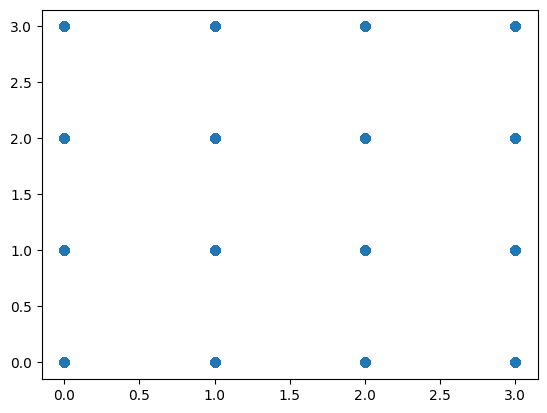

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(appended_preds.cpu().numpy())
#plt.plot(appended_true.cpu().numpy())
plt.scatter(appended_preds.cpu().numpy(), appended_true.cpu().numpy())



In [ ]:
total = len(appended_true)
correct = (appended_preds == appended_true).sum().item()
accuracy = correct / total * 100

accuracy

25.464646464646464